In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 #Replacing blanks with 0 as teanure is 0 and no total charges are recorded

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df["customerID"].duplicated().sum()

0

In [9]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

#Converted 0 and 1 values of senior citizen to yes or no to make it easier to understand

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


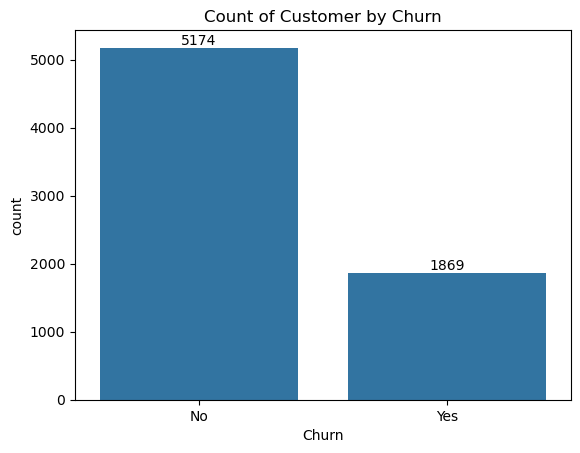

In [11]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0]) 
plt.title('Count of Customer by Churn')
plt.show()

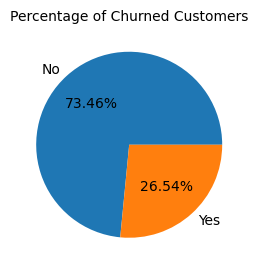

In [12]:
plt.figure(figsize = [3,4])
gb = df.groupby('Churn').agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

#From given pie chart we can conclude that 26.54% of our customers have churned out.
#not Let's explore the reason behind it

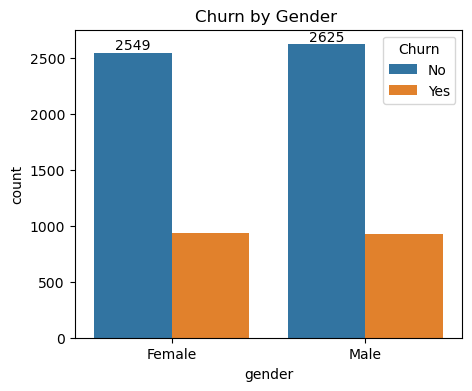

In [13]:
plt.figure(figsize = [5,4])
ax = sns.countplot(x = 'gender', data = df, hue = 'Churn')

ax.bar_label(ax.containers[0])
plt.title("Churn by Gender ")
plt.show()

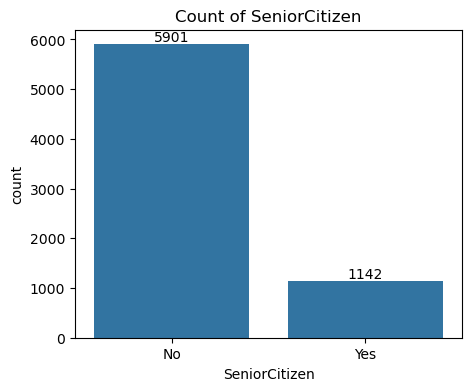

In [14]:
plt.figure(figsize = [5,4])
ax = sns.countplot(x = 'SeniorCitizen', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of SeniorCitizen")
plt.show()

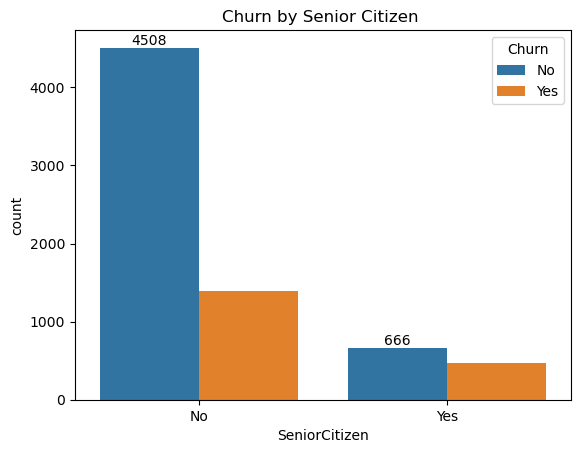

In [15]:
ax = sns.countplot(x = 'SeniorCitizen', data = df,hue = "Churn")

ax.bar_label(ax.containers[0])
plt.title("Churn by Senior Citizen ")
plt.show()

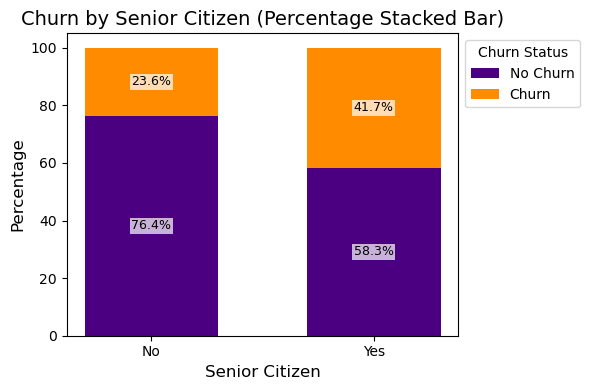

In [16]:
churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate percentages for each 'SeniorCitizen' category
# For each row (SeniorCitizen_Label), divide the 'No' and 'Yes' churn counts by their sum
# This gives the percentage of 'No Churn' and 'Yes Churn' within each SeniorCitizen group
churn_percentages = churn_counts.apply(lambda x: x / x.sum() * 100, axis=1)

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(6, 4))

# Plot 'No' churn as the base of the stack
# We are plotting the 'No' churn percentages for 'No Senior Citizen' and 'Yes Senior Citizen'
p1 = ax.bar(churn_percentages.index, churn_percentages['No'], label='No Churn', color='indigo', width=0.6)

# Plot 'Yes' churn on top of 'No' churn
# The 'bottom' parameter ensures that 'Yes' bars start where 'No' bars end, creating the stack
p2 = ax.bar(churn_percentages.index, churn_percentages['Yes'], bottom=churn_percentages['No'], label='Churn', color='darkorange', width=0.6)

# Add labels and title
ax.set_xlabel('Senior Citizen', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_title('Churn by Senior Citizen (Percentage Stacked Bar)', fontsize=14)
ax.legend(title='Churn Status',bbox_to_anchor = (1.0,1.0), fontsize=10)

# Add percentage labels to the bars
# Iterate through each set of bars (p1 and p2)
for bars in [p1, p2]:
    for bar in bars:
        height = bar.get_height() # Get the height of the current bar (its percentage value)
        if height > 0: # Only add label if the bar segment has a value
            ax.text(bar.get_x() + bar.get_width() / 2, # X-position: center of the bar
                    bar.get_y() + height / 2,          # Y-position: middle of the bar segment
                    f'{height:.1f}%',                 # The text to display, formatted to one decimal place
                    ha='center', va='center', color='black', fontsize=9,
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)) # White background for readability

# Improve layout and display the plot
plt.tight_layout()
plt.show()

#comparatively a greater percentage of people in senior citizen category hae churned

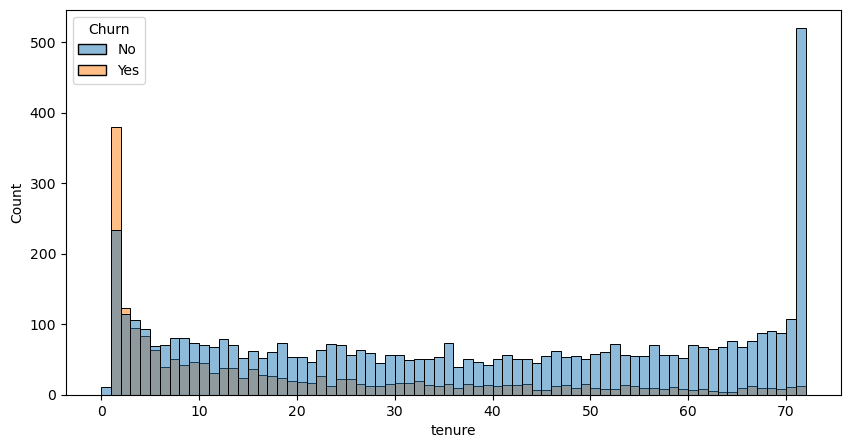

In [17]:
plt.figure(figsize = [10,5])
sns.histplot(x = 'tenure', data = df, bins = 72, hue = "Churn")
plt.show()

In [18]:
 #people who have used our survices for a long time have stayed and people who have used our survices for one or two months have churned

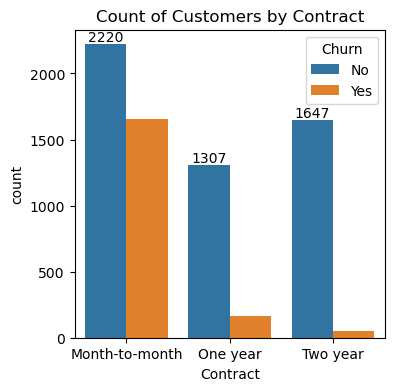

In [19]:
plt.figure(figsize =[4,4])
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

In [20]:
#people who have month to month contract are likely to churn then from those who have 1 or 2 years of contract

In [23]:
import math

In [21]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

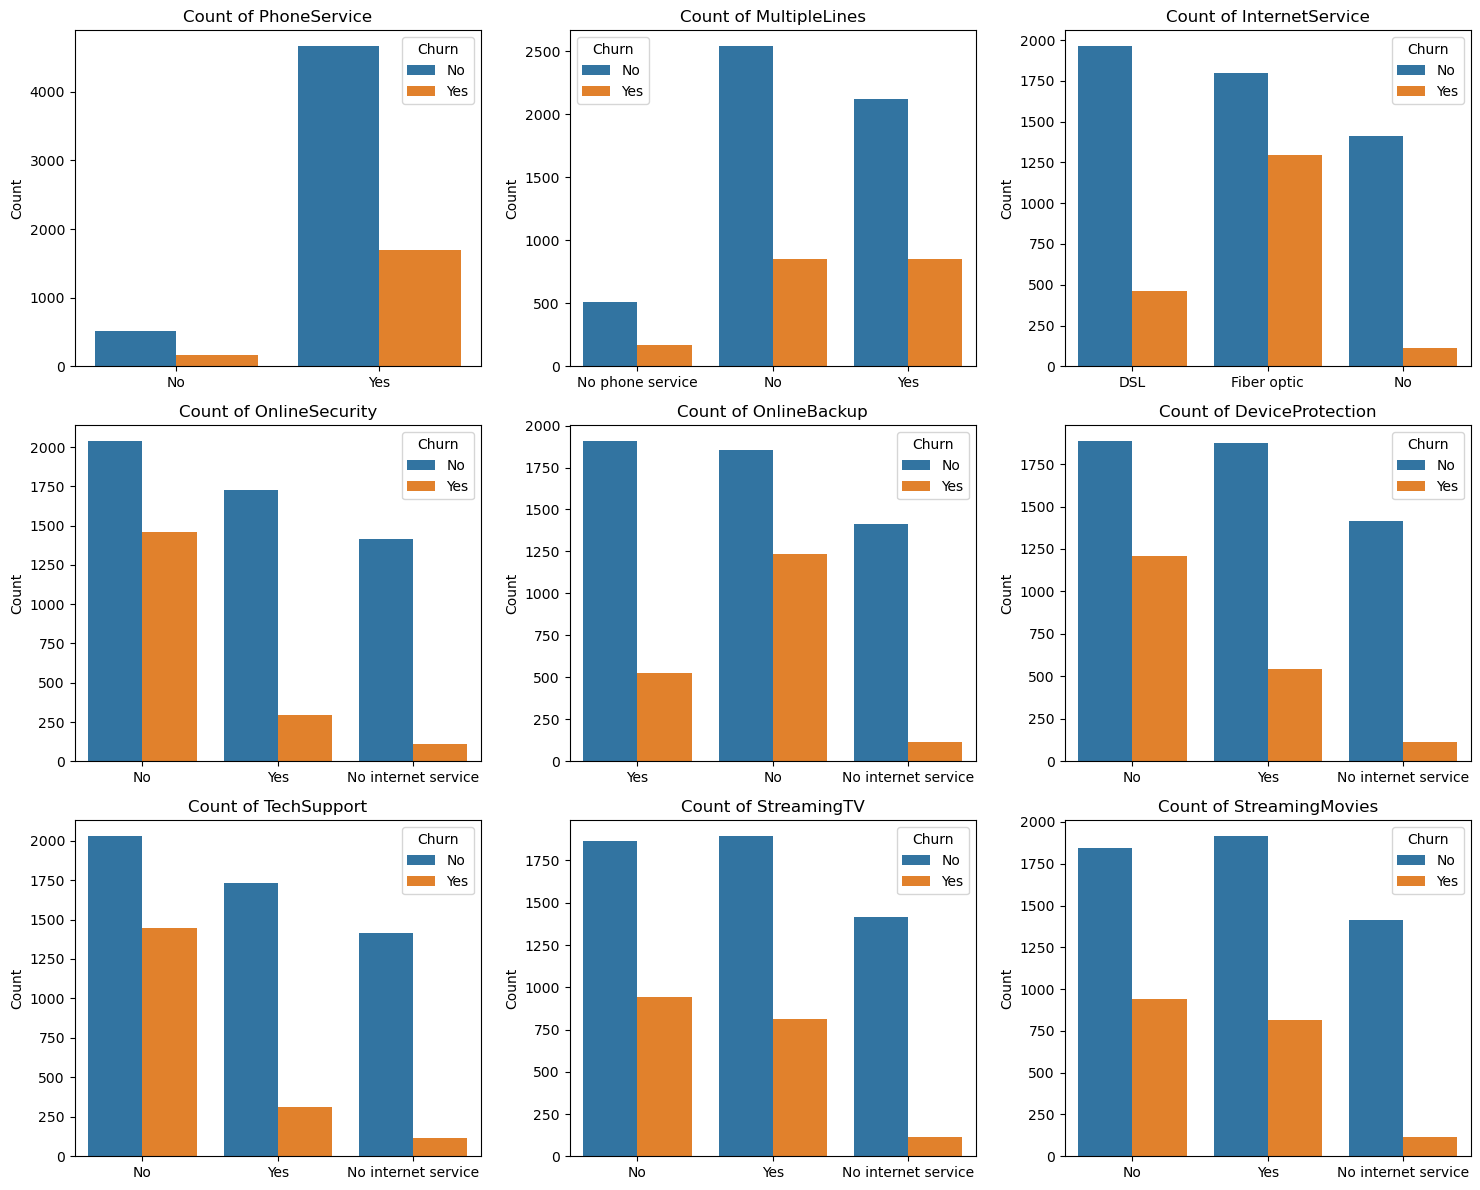

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 1. Define the columns provided by the user
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# 2. Load your actual data from 'Customer Churn.csv'
try:
    df = pd.read_csv('Customer Churn.csv')
except FileNotFoundError:
    print("Error: 'Customer Churn.csv' not found. Please ensure the file is in the correct directory.")
    # Fallback to dummy data if file not found, for demonstration purposes
    # In a real scenario, you might want to stop execution or raise an error.
    data = {
        'PhoneService': ['Yes', 'No', 'Yes', 'No', 'Yes'] * 20,
        'MultipleLines': ['No', 'Yes', 'No', 'No', 'Yes'] * 20,
        'InternetService': ['DSL', 'Fiber optic', 'DSL', 'No', 'Fiber optic'] * 20,
        'OnlineSecurity': ['No', 'Yes', 'No', 'No', 'Yes'] * 20,
        'OnlineBackup': ['Yes', 'No', 'Yes', 'No', 'Yes'] * 20,
        'DeviceProtection': ['No', 'No', 'Yes', 'No', 'Yes'] * 20,
        'TechSupport': ['Yes', 'No', 'No', 'No', 'Yes'] * 20,
        'StreamingTV': ['No', 'Yes', 'No', 'No', 'Yes'] * 20,
        'StreamingMovies': ['Yes', 'No', 'Yes', 'No', 'No'] * 20,
    }
    # Ensure all lists have the same length for DataFrame creation
    # Adjust length for actual data if needed
    for col in data:
        data[col] = data[col][:len(columns) * 100 // len(columns)]
    df = pd.DataFrame(data)
    print("Using dummy data for demonstration as 'Customer Churn.csv' was not found.")


# 3. Calculate the number of rows and columns for the subplots
num_cols = 3  # You can adjust this number based on how many plots you want per row
num_rows = math.ceil(len(columns) / num_cols)

# 4. Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4)) # Adjust figsize as needed
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# 5. Iterate through the columns and create a countplot for each
for i, col in enumerate(columns):
    if col in df.columns: # Check if the column exists in the DataFrame
        sns.countplot(data=df, x=col, ax=axes[i], hue = df["Churn"])
        axes[i].set_title(f'Count of {col}')
        axes[i].set_xlabel('') # Remove x-label to avoid clutter, title is sufficient
        axes[i].set_ylabel('Count')
    else:
        # If a column is not found in the DataFrame, you can add a placeholder or skip
        axes[i].set_title(f'Column "{col}" not found in DataFrame')
        axes[i].axis('off') # Turn off axis for empty plot

# 6. Hide any unused subplots if the number of plots is not a perfect multiple
for j in range(len(columns), len(axes)):
    if j < len(axes): # Ensure index is within bounds before trying to delete
        fig.delaxes(axes[j])

# 7. Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# 8. Display the plots
plt.show()


#The bar plots illustrate customer churn across various services. Customers with "No" phone service show very low churn, while those with phone service have a higher churn rate, especially if they have multiple lines. Internet services like Fiber Optic and DSL also contribute to churn, with Fiber Optic users having a particularly high churn rate. Additional services such as Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies generally show higher churn among customers who do not subscribe to them, while those who do subscribe tend to have lower churn rates.

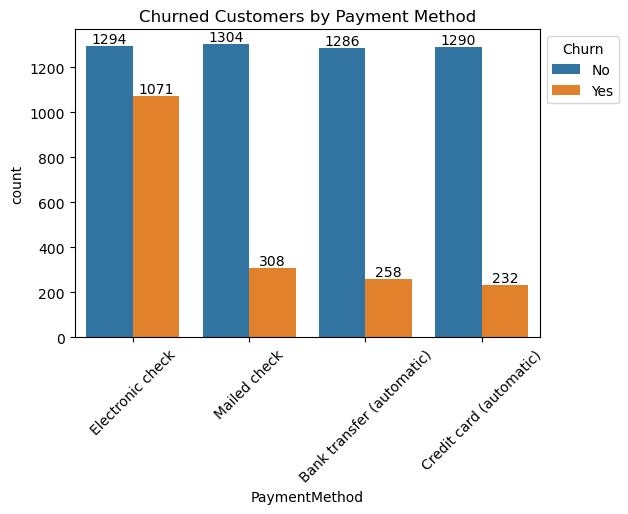

In [37]:
plt.figure(figsize = [6,4])
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.legend(title = 'Churn',bbox_to_anchor = [1.0,1.0])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

In [38]:
#Customer is likely to churn when he is using electronic chech as a payment method

In [39]:
!pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34821 sha256=9bbe6f1c9b71ab471c020196881e0aef24552283979562b34c8ee2fc61589573
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\9c\2f\9f\b1aac8c3e74b4ee327dc8c6eac5128996f9eadf586e2c0ba67
Successfully built pandoc


In [40]:
import pandoc